In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# 1 DATA PRE-PROCESSING
## 1.1 Data Understanding
Bertujuan untuk memahami dataset baik secara format dan konteks data. Pemahaman data secara format meliputi jumlah baris, kolom, tipe data, level of measurement, identifikasi unique data dan missing value. Sedangkan pemahaman data secara konteks yaitu mengetahui data dari perspektif domain knowledge bisnis nya.

Error ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2 mengindikasikan bahwa ada masalah dalam membaca file CSV, kemungkinan besar karena format file atau karakter khusus dalam file yang menyebabkan parser tidak dapat memprosesnya dengan benar. Kemungkinan besar masalah nya ada karakter delimeter yang salah atau ada delimeter selain tanda koma pada file csv. Selanjutnya kita mencoba untuk memeriksa dan memastikan file csv mengguanakan koma sebagai delimeter yang benar.

In [2]:
# import dataset
dataset = "C:\Modul 1\Dataset\Airbnb Listings Bangkok.csv"

# memastikan delimeter file csv menggunakan tanda koma
try:
    rawdf = pd.read_csv(dataset, delimiter=';')
except pd.errors.ParserError:
    rawdf = pd.read_csv(dataset)

display(rawdf.head(),rawdf.tail())

,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,1.375.983,10.054.134,Entire home/apt,1905,3,65.0,06/01/2020,0.50,2.0,353.0,0.0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,1.366.818,10.061.674,Private room,1316,1,0.0,NaN,NaN,2.0,358.0,0.0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,1.375.232,10.062.402,Private room,800,60,0.0,NaN,NaN,1.0,365.0,0.0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,1.378.823,10.057.256,Private room,1286,7,2.0,01/04/2022,0.03,1.0,323.0,1.0
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,1.376.872,10.063.338,Private room,1905,1,0.0,NaN,NaN,3.0,365.0,0.0


,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15932,15932,"7,90E+17",素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715.132.488.668.000,10.065.345.836.850.000,Private room,2298,28,0.0,NaN,NaN,1.0,362.0,0.0
15933,15933,"7,90E+17",Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753.052.179.856.500,10.053.873.793.615.500,Private room,1429,1,0.0,NaN,NaN,14.0,365.0,0.0
15934,15934,"7,90E+17",Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753.169.465.051.800,10.053.870.002.416.600,Private room,1214,1,0.0,NaN,NaN,14.0,365.0,0.0
15935,15935,"7,90E+17",Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754.788.688.549.800,1.005.387.573.223.570,Private room,1214,1,0.0,NaN,NaN,14.0,365.0,0.0
15936,15936,"7,90E+17",Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,1.375.296,10.054.082,Private room,1214,1,0.0,NaN,NaN,14.0,365.0,0.0


In [3]:
# identifikasi jumlah baris & kolom (shape) pada dataframe rawdf
print(f'Jumlah baris dan kolom di dataset df adalah {rawdf.shape}')
rawdf.info()

Jumlah baris dan kolom di dataset df adalah (15937, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15937 entries, 0 to 15936
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   no                              15937 non-null  int64  
 1   id                              15930 non-null  object 
 2   name                            15921 non-null  object 
 3   host_id                         15830 non-null  object 
 4   host_name                       15829 non-null  object 
 5   neighbourhood                   15830 non-null  object 
 6   latitude                        15830 non-null  object 
 7   longitude                       15830 non-null  object 
 8   room_type                       15830 non-null  object 
 9   price                           15830 non-null  object 
 10  minimum_nights                  15789 non-null  object 
 11  number_of_reviews               15788

**Dataset knowledge & data clean plan 1:**

Dataset merupakan data listing property yang disewakan pada platform Airbnb di Bangkok, Thailand. Data tersebut merupakan hasil dari inputan keterangan tentang property yang disewakan oleh host dengan rincian sebagai berikut:
- `no` -> nomor baris -> **numerical** -> **integer**  
- `id` -> unique id untuk listing Airbnb -> **numerical** -> **integer**
- `name` -> nama listing -> **categorical** -> **object**
- `host_id` -> unique id untuk host Airbnb  -> **numerical** -> **integer**
- `host_name` -> nama host (property owner)  -> **categorical** -> **object**
- `neighbourhood` -> lingkungan di-geocode menggunakan latitude dan longitude berdasarkan data shapefile publik atau terbuka  -> **categorical** -> **object**
- `latitude` -> proyeksi World Geodetic System (WGS84) untuk latitude dan longitude -> **numerical** -> **float**
- `longtitude` -> proyeksi World Geodetic System (WGS84) untuk latitude dan longitude -> **numerical** -> **float**
- `room_type` -> tipe kamar  -> **categorical** -> **object**
- `price` -> harga sewa per malam  -> **numerical** -> **float**
- `minimum_nights` -> jumlah malam minimum untuk menginap  -> **numerical** -> **integer**
- `number_of_reviews` -> jumlah review oleh visitor  -> **numerical** -> **integer**
- `last_review` -> tanggal review terbaru  -> **date/time** -> **datetime64[ns]**
- `reviews_per_month` -> rata-rata review per bulan  -> **numerical** -> **float**
- `calculated_host_listings_count` -> jumlah listing yang dimiliki host di kota/region saat ini  -> **numerical** -> **integer**
- `availability_365` -> ketersediaan listing dalam x hari ke depan max 365 hari. (karena telah dipesan atau diblokir oleh host)  -> **numerical** -> **integer**
- `number_of_reviews_ltm` -> jumlah review oleh visitor dalam 12 bulan terakhir  -> **numerical** -> **integer**


**Dataset knowledge & data clean plan 2:**

- Jika dilihat sekilas, terdapat baris data duplikat pada kolom `name` `host_id` `host_name` `neighbourhood`, kemungkinan host mengupload property nya lebih dari 1x pada platform Airbnb. Sehingga penanganan untuk data cleaning adalah **menghapus baris data duplikat berdasarkan duplikasi data pada kolom `name` `host_id` `host_name` `neighbourhood`**.

**Dataset knowledge & data clean plan 3:**
- Pada kolom `latitude` dan `longtitude` memiliki jumlah digit yang berbeda-beda. Sedangkan format digit lat-long sebaiknya adalah Decimal Degree. Sehingga penanganan untuk data cleaning adalah **mengubah format `latitude` dan `longtitude` menjadi decimal degree**.

In [4]:
# missing value identification dataframe rawdf
missing_percentage = rawdf.isna().sum() / rawdf.shape[0] * 100
missing_count = rawdf.isna().sum()

rawdf_missing_data = pd.DataFrame({
    'Missing Value Percentage': missing_percentage,
    'Missing Value Count': missing_count})

rawdf_missing_data


,Missing Value Percentage,Missing Value Count
no,0.000000,0
id,0.043923,7
name,0.100395,16
host_id,0.671394,107
host_name,0.677668,108
neighbourhood,0.671394,107
latitude,0.671394,107
longitude,0.671394,107
room_type,0.671394,107
price,0.671394,107


<Axes: >

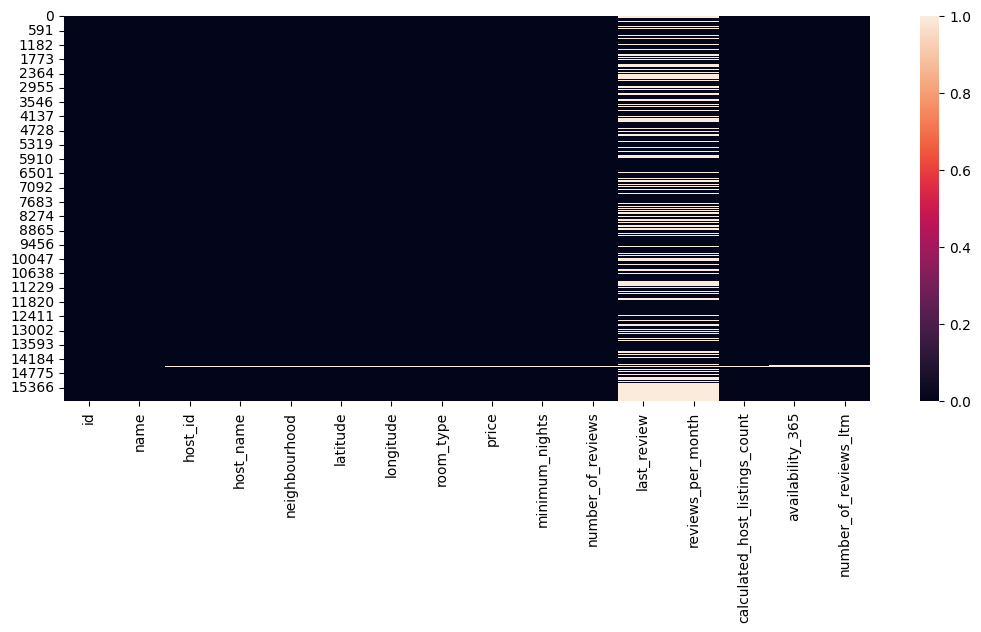

In [5]:
# missing value mapping dataframe rawdf
plt.figure(figsize=(13,5))
sns.heatmap(rawdf[['id','name','host_id','host_name','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].isna())

In [6]:
# Cek apakah jumlah missing value di kolom 'last_review' dan 'reviews_per_month' sama dengan jumlah data kolom 'number_of_reviews' yang bernilai 0.0

# Cek jumlah baris dengan missing value di kolom 'last_review' berdasarkan 'number_of_reviews' bernilai 0.0
missing_last_review = rawdf[rawdf['last_review'].isna() & (rawdf['number_of_reviews'] == 0.0)]['number_of_reviews'].value_counts()

# Cek jumlah baris dengan missing value di kolom 'reviews_per_month' berdasarkan 'number_of_reviews' bernilai 0.0
missing_reviews_per_month = rawdf[rawdf['reviews_per_month'].isna() & (rawdf['number_of_reviews'] == 0.0)]['number_of_reviews'].value_counts()

# Tampilkan hasil
display(missing_last_review, missing_reviews_per_month)

number_of_reviews
0.0    5732
Name: count, dtype: int64

number_of_reviews
0.0    5732
Name: count, dtype: int64

**Dataset knowledge & data clean plan 4:**

- Berdasarkan hasil identifikasi missing value, kolom `last_review` dan `reviews_per_month` dengan persentase missing value terbesar yaitu 36% atau 5840-an baris data. Sedangkan sisanya memiliki persentase missing value yang sangat kecil yaitu berkisar <1% sd 1,1% atau 16-182 baris data.
- Berdasarkan heatmapping missing value terlihat bahwa missing value pada kolom `last_review` dan `review_per_month` berada pada baris yang sama.
- Jumlah missing value pada kolom `last_review`: 5841 dan `reviews_per_month` : 5842
- Kemudian jumlah data pada kolom `number_of_reviews` yang bernilai 0.0 adalah 5732
- Dapat disimpulkan bahwa missing value pada kolom `last_review` dan `reviews_per_month` diakibatkan karena `number_of_reviews` bernilai 0 atau memang tidak ada review pada listings tersebut.
- **Sehingga penanganan missing value pada kolom `last_review` dan `reviews_per_month` akan di isi dengan (**no review**), namun hanya sebatas pada `number_of_reviews` yang bernilai 0 saja**

In [7]:
# general stats description dataframe rawdf
display(rawdf.describe(), rawdf.describe(include='all'))

,no,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15937.000000,15788.000000,10097.00000,15830.000000,15758.000000,15757.000000
mean,7968.000000,16.700610,2.69485,13.910865,244.169247,3.498382
std,4600.759955,40.676921,24.47751,30.417421,125.892566,8.940003
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3984.000000,0.000000,0.12000,1.000000,137.000000,0.000000
50%,7968.000000,2.000000,0.44000,4.000000,309.000000,0.000000
75%,11952.000000,13.250000,1.08000,13.000000,360.000000,3.000000
max,15936.000000,1224.000000,365.00000,362.000000,365.000000,325.000000


,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15937.000000,15930,15921,15830,15829,15830,15830,15830,15830,15830,15789,15788.000000,10097,10097.00000,15830.000000,15758.000000,15757.000000
unique,NaN,12605,14857,6632,5345,124,9555,10220,21,3044,118,NaN,1676,NaN,NaN,NaN,NaN
top,NaN,"7,35E+17",New! La Chada Night Market studio 2PPL near MRT,201677068,Curry,Vadhana,Private room,1.005.198.909,Entire home/apt,1500,1,NaN,11/12/2022,NaN,NaN,NaN,NaN
freq,NaN,50,45,228,228,2143,37,23,8876,417,8201,NaN,189,NaN,NaN,NaN,NaN
mean,7968.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.700610,NaN,2.69485,13.910865,244.169247,3.498382
std,4600.759955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676921,NaN,24.47751,30.417421,125.892566,8.940003
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.00000,0.000000,0.000000,0.000000
25%,3984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.12000,1.000000,137.000000,0.000000
50%,7968.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,0.44000,4.000000,309.000000,0.000000
75%,11952.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.250000,NaN,1.08000,13.000000,360.000000,3.000000


In [8]:
# unique data & anomali identification
pd.set_option('display.max_colwidth', None)
listItem = []
for col in rawdf.columns :
    listItem.append( [col, rawdf[col].nunique(), rawdf[col].unique()])

rawdf_uniq_anomali = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unique Data', 'Sampel Unique Data'],
                     data=listItem)
rawdf_uniq_anomali


,Nama Kolom,Jumlah Unique Data,Sampel Unique Data
0,no,15937,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,12605,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14857,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room,

**Dataset knowledge & data clean plan 5:**

- `no` -> terdapat 15939 unique data dari total 15939 data -> tidak menunjukan adanya data anomali   
- `id` -> terdapat 12607 unique data dari total 15939 data -> terlihat ada data dengan jumlah digit 5, 6 dan 7, walaupun cukup aneh karena jumlah digit listing id pada umumnya seragam namun pada analisis kali ini tidak dilakukan intervensi data
- `name` -> terdapat 14859 unique data dari total 15939 data -> terlihat ada beberapa data dengan format penulisan nama yang tidak rapi dan terkesan penjelasan/deskripsi fasilitas. pada analisis ini tidak akan dilakukan intervensi data, namun sebagai saran untuk tim product agar dapat menambahkan field `property_description` dan setting policy format input `name` dengan font yang lebih rapi
- `host_id` -> terdapat 6632 unique data dari total 15939 data -> data terlihat normal dengan 6 digit dan 7 digit sehingga tidak dilakukan intervensi data
- `host_name` -> terdapat 5347 unique data dari total 15939 data -> data terlihat normal sehingga tidak dilakukan intervensi data
- `neighbourhood` -> terdapat 126 unique data dari total 15939 data -> terlihat ada sebagian data anomali berupa data longtitude, **sehingga perlu di teliti lebih lanjut pada data cleaning untuk jumlah data anomali nya, jika >10% maka kolom ini tidak akan digunakan untuk analisis karena tidak ada opsi untuk mengisi data tersebut**
- `latitude` -> terdapat 9555 unique data dari total 15939 data -> data masih memiliki format bilangan desimal, namun secara keseluruhan berada pada garis lintang 13derajat. **sehingga penanganan data cleaning berupa select 7 digit dari depan dan konversi ke decimal degree**
- `longtitude` -> terdapat 10222 unique data dari total 15939 data -> data masih memiliki format bilangan desimal, namun secara keseluruhan berada pada garis bujur 100derajat. **sehingga penanganan data cleaning berupa select 8 digit dari depan dan konversi ke decimal degree**
- `room_type` -> terdapat 22 unique data dari total 15939 data -> seharus nya hanya 4 uniqe data, **sehingga perlu di teliti lebih lanjut pada data cleaning untuk jumlah data anomali nya dan korelasi dengan kolom lainya untuk intervensi data**
- `price` -> terdapat 3046 unique data dari total 15939 data -> tidak menunjukan adanya data anomali
- `minimum_nights` -> terdapat 120 unique data dari total 15939 data -> terlihat ada 2 jenis data anomali. Pertama jumlah minimum hari >30 hari (1bulan) yang terlihat kurang masuk akal karena satuan sewa harga per malam. Kedua terdapat data dengan format tanggal (dd/mm/yyyy). **sehingga penanganan data cleaning akan menghitung jumlah data anomali serta opsi untuk intervensi data melalui mengganti data dengan nilai median**
- `number_of_reviews` -> terdapat 318 unique data dari total 15939 data -> tidak menunjukan adanya data anomali
- `last_review` -> terdapat 1676 unique data dari total 15939 data -> tidak menunjukan adanya data anomali
- `reviews_per_month` -> terdapat 554 unique data dari total 15939 data -> hanya terlihat missing value dan tidak menunjukan adanya data anomali
- `calculated_host_listings_count` -> terdapat 52 unique data dari total 15939 data -> terlihat beberapa data yang aneh berupa data >10 listing per host. jika dilihat dari total 15939 listing, `host_name` nya 5347 artinya asumsi rasio 1 host 3 listing **sehingga penangangan data cleaning perlu melihat pengelompokan `id` berdasarkan `host_name` dan menghitung jumlah data anomali serta opsi untuk intervensi data melalui mengganti data dengan nilai median**
- `availability_365` -> terdapat 366 unique data dari total 15939 data -> tidak menunjukan adanya data anomali
- `number_of_reviews_ltm` -> terdapat 85 unique data dari total 15939 data -> tidak menunjukan adanya data anomali


## 1.2 Data Cleaning
Setelah memahami dataset secara format dan konteks, selanjutnya melakukan data cleaning berdasarkan insights dataset knowledge & data clean plan yang sudah ditentukan sebelumnya serta intervensi data menggunakan domain knowledge bisnis marketplace rental properti. Proses data cleaning terbagi menjadi 3 kategori yaitu:
1. Penanganan missing value & duplicat data
2. Intervensi data anomali
3. Adjustment tipe python/Dtype

**1.2.1 Missing value & duplicate data**

**Hapus baris data yang duplikat**

In [9]:
# Hapus baris duplikat berdasarkan kolom 'name', 'host_id', 'host_name', dan 'neighbourhood'
clean_df = rawdf.drop_duplicates(subset=['name', 'host_id', 'host_name', 'neighbourhood'])

print(f'Jumlah baris dan kolom di dataset setelah hapus duplikat adalah {clean_df.shape} dari yang semulanya 15939 baris')

Jumlah baris dan kolom di dataset setelah hapus duplikat adalah (15052, 17) dari yang semulanya 15939 baris


**Missing value pada kolom `last_review` dan `reviews_per_month`:** 

`last_review` akan di isi dengan (**no review**) dan `reviews_per_month` akan di isi 0, namun hanya sebatas pada `number_of_reviews` yang bernilai 0 saja

In [10]:
# Identifikasi missing value dan nilai number_of_reviews yang bernilai 0
missing_last_review = clean_df['last_review'].isna()
missing_reviews_per_month = clean_df['reviews_per_month'].isna()
zero_reviews = clean_df['number_of_reviews'] == 0

# Mengisi missing value pada kolom 'last_review' dan 'reviews_per_month' dengan 'no review'
clean_df.loc[missing_last_review & zero_reviews, 'last_review'] = 'no review'
clean_df.loc[missing_reviews_per_month & zero_reviews, 'reviews_per_month'] = 0

# Menghitung jumlah dan persentase missing value setelah penanganan
total_rows = clean_df.shape[0]
missing_count_last_review_after = clean_df['last_review'].isna().sum()
missing_count_reviews_per_month_after = clean_df['reviews_per_month'].isna().sum()
missing_percent_last_review_after = (missing_count_last_review_after / total_rows) * 100
missing_percent_reviews_per_month_after = (missing_count_reviews_per_month_after / total_rows) * 100

print(f'Missing value pada kolom `last_review` setelah di isi no review adalah {missing_count_last_review_after} atau {missing_percent_last_review_after}%')
print(f'Missing value pada kolom `reviews_per_month` setelah di isi no review adalah {missing_count_reviews_per_month_after} atau {missing_percent_reviews_per_month_after}%')

Missing value pada kolom `last_review` setelah di isi no review adalah 96 atau 0.6377889981397821%
Missing value pada kolom `reviews_per_month` setelah di isi no review adalah 96 atau 0.6377889981397821%


In [11]:
# Menghapus baris dengan missing value pada kolom 'last_review' dan 'reviews_per_month'
clean_df = clean_df.dropna(subset=['last_review', 'reviews_per_month'])

**1.2.2 Intervensi data anomali**

**Intervensi data anomali dan konversi format pada kolom `latitude` dan `longtitude` menjadi format decimal degree**

In [12]:
# Handle kolom `latitude` dan `longtitude`
# Fungsi untuk mengambil digit yang diinginkan
def take_digits(series, n):
    series = series.str.replace('.', '', regex=False)  # Hilangkan semua titik
    return series.str[:n]  # Ambil n digit pertama

# Ambil 7 digit pertama untuk latitude dan 8 digit pertama untuk longitude
clean_df['latitude'] = take_digits(clean_df['latitude'], 7)
clean_df['longitude'] = take_digits(clean_df['longitude'], 8)

# Fungsi untuk membersihkan dan mengonversi kolom ke decimal degree
def convert_to_decimal_degree(series, divisor):
    series = pd.to_numeric(series, errors='coerce')  # Konversi ke numeric, ubah yang tidak valid menjadi NaN
    series = series / divisor  # Bagi dengan nilai divisor untuk mengubah ke format decimal degree
    return series

# Terapkan fungsi pada kolom 'latitude' dan 'longitude'
clean_df['latitude'] = convert_to_decimal_degree(clean_df['latitude'], 1_000_000)
clean_df['longitude'] = convert_to_decimal_degree(clean_df['longitude'], 10_000_000)

**Intervensi data anomali pada kolom `neighbourhood`:**

Mendeteksi anomali yang bukan berupa string (nama tempat) dan mengandung angka. Dalam hal ini, kita akan menganggap data yang tidak dapat dikonversi menjadi string adalah anomali.

In [13]:
# Fungsi untuk mengidentifikasi anomali
def is_not_place_name(value):
    try:
        # Jika value bisa diubah menjadi string dan tidak mengandung angka, return False (bukan anomali)
        str_value = str(value)
        return not any(char.isdigit() for char in str_value)  # True jika tidak mengandung angka
    except ValueError:
        return True  # Jika tidak bisa diubah menjadi string, anggap sebagai anomali

# Menghilangkan tanda titik (.)
clean_df['neighbourhood'] = clean_df['neighbourhood'].str.replace('.', '')

# Menghitung jumlah dan persentase data yang bukan nama tempat
anomalous_neighbourhood_count = sum(clean_df['neighbourhood'].apply(is_not_place_name))
total_neighbourhood_count = len(clean_df['neighbourhood'])
percentage_anomalous_neighbourhood = (anomalous_neighbourhood_count / total_neighbourhood_count) * 100

# Menampilkan hasil
print(f"Jumlah data yang bukan nama tempat: {anomalous_neighbourhood_count}")
print(f"Persentase data yang bukan nama tempat: {percentage_anomalous_neighbourhood:.2f}%")

Jumlah data yang bukan nama tempat: 14883
Persentase data yang bukan nama tempat: 99.52%


Karena jumlah data anomali sangat banyak mencapai 99.52% dari total keseluruhan data, serta tidak adanya cara lain untuk mengisi data tersebut, maka kolom `neighbourhood` tidak digunakan untuk keperluan analisis dan akan di hapus kolom nya.

Temuan ini akan di laporkan kepada tim yang relevan supaya kedepanya kualitas data `neighbourhood` dapat di tingkatkan untuk keperluan analisis.

**Intervensi data anomali pada kolom `room_type`**

In [14]:
# Identifikasi anomali
valid_room_types = ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

# Hitung jumlah dan persentase anomali
total_anomalous_room_type_count = len(clean_df[~clean_df['room_type'].isin(valid_room_types)])
percentage_annomalous_room_type = (total_anomalous_room_type_count / len(clean_df)) * 100

print(f"Jumlah data anomali pada kolom room_type sebelum pembersihan: {total_anomalous_room_type_count}")
print(f"Persentase data anomali pada kolom room_type sebelum pembersihan: {percentage_annomalous_room_type:.2f}%")

Jumlah data anomali pada kolom room_type sebelum pembersihan: 72
Persentase data anomali pada kolom room_type sebelum pembersihan: 0.48%


Karena jumlah data anomali hanya sebesar 0.48% serta tidak ada cara lain untuk penggantian data, maka akan dilakukan penghapusan data.

In [15]:
# Hapus data anomali
clean_df = clean_df[clean_df['room_type'].isin(valid_room_types)].copy()

# Hitung kembali jumlah data setelah penghapusan
remaining_data_room_type = len(clean_df)
percentage_remaining_data_room_type = (remaining_data_room_type / len(clean_df)) * 100

print(f"Jumlah data anomali pada kolom room_type yang dihapus: {total_anomalous_room_type_count}")
print(f"Jumlah data pada kolom room_type yang tersisa setelah penghapusan: {remaining_data_room_type}")
print(f"Persentase data yang tersisa: {percentage_remaining_data_room_type:.2f}%")

Jumlah data anomali pada kolom room_type yang dihapus: 72
Jumlah data pada kolom room_type yang tersisa setelah penghapusan: 14883
Persentase data yang tersisa: 100.00%


**Intervensi data anomali pada kolom `minimum_nights`**

In [16]:
# Konversi tipe data kolom minimum_nights menjadi integer
clean_df['minimum_nights'] = pd.to_numeric(clean_df['minimum_nights'], errors='coerce').fillna(0).astype(int)

# Fungsi untuk mendeteksi anomali
def is_anomalous(value):
    if isinstance(value, (int, float)):
        if value > 30:
            return True
    elif isinstance(value, str):
        # Cek apakah nilai dapat diubah menjadi tanggal (jika tidak, anggap sebagai anomali)
        try:
            pd.to_datetime(value)
            return True
        except ValueError:
            return False
    return False

# Filter data anomali
anomalous_data = clean_df[clean_df['minimum_nights'].apply(is_anomalous)]

# Hitung jumlah dan persentase data anomali
anomalous_minimum_nights_count = anomalous_data.shape[0]
total_data = clean_df.shape[0]
percentage_anomalous_minimum_nights = (anomalous_minimum_nights_count / total_data) * 100

# Tampilkan hasil
print(f"Jumlah data anomali: {anomalous_minimum_nights_count}")
print(f"Persentase data anomali: {percentage_anomalous_minimum_nights:.2f}%")

# Menampilkan sampel data anomali pada kolom minimum_nights
anomaly_samples = clean_df[clean_df['minimum_nights'].apply(lambda x: isinstance(x, str) or x > 30)]
print(anomaly_samples[['minimum_nights']])

Jumlah data anomali: 861
Persentase data anomali: 5.79%
       minimum_nights
2                  60
5                 250
23                 60
38                180
39                 90
...               ...
15737              60
15752              80
15768             180
15777             180
15828              90

[861 rows x 1 columns]


Selanjutnya akan dilakukan penggantian data menggunakan nilai median untuk 861 data anomali tersebut.

In [17]:
# Identifikasi data anomali berdasarkan fungsi is_anomalous
anomaly_mask = clean_df['minimum_nights'].apply(is_anomalous)

# Hitung nilai median dari kolom minimum_nights
median_minimum_nights = clean_df.loc[~anomaly_mask, 'minimum_nights'].median()

# Penggantian data dengan nilai median untuk data yang memenuhi kriteria anomali
clean_df.loc[anomaly_mask, 'minimum_nights'] = median_minimum_nights

**Intervensi data pada kolom `calculated_host_listings_count`:**

Dari total 15939 listing, `host_name` nya 5347 artinya asumsi rasio host:listing -> 1:3

In [18]:
# Konversi tipe data kolom calculated_host_listings_count menjadi integer
clean_df['calculated_host_listings_count'] = pd.to_numeric(clean_df['calculated_host_listings_count'], errors='coerce').fillna(0).astype(int)

# Fungsi untuk mendeteksi anomali
def identify_anomalies(df, col_name, threshold):
    # Mendeteksi anomali
    anomalies = df[df[col_name] > threshold]
    
    # Menghitung jumlah data anomali
    anomaly_count = anomalies.shape[0]
    
    # Menghitung persentase data anomali
    total_rows = df.shape[0]
    anomaly_percentage = (anomaly_count / total_rows) * 100
    
    # Menampilkan hasil
    print(f"Jumlah data anomali pada kolom {col_name}: {anomaly_count}")
    print(f"Persentase data anomali pada kolom {col_name}: {anomaly_percentage:.2f}%")

# Menggunakan fungsi untuk kolom 'calculated_host_listings_count' dengan threshold 3
identify_anomalies(clean_df, 'calculated_host_listings_count', 3)

Jumlah data anomali pada kolom calculated_host_listings_count: 7671
Persentase data anomali pada kolom calculated_host_listings_count: 51.54%


In [19]:
# menghitung median kolom calculated_host_listings_count
median_calculated_host_listings_count = clean_df['calculated_host_listings_count'].median()
print (f"median sebesar: {median_calculated_host_listings_count}")

median sebesar: 4.0


- Sebanyak 51.54% data pada kolom `calculated_host_listings_count` memiliki nilai >3
- Kemudian nilai median sebesar 4
- Dalam hal ini, intervensi data yang dilakukan berupa mengganti data anomali (>3) dengan nilai median (4)

In [20]:
# Identifikasi data anomali
anomaly_condition = clean_df['calculated_host_listings_count'] > 3

# Ganti nilai anomali dengan nilai median
clean_df.loc[anomaly_condition, 'calculated_host_listings_count'] = median_calculated_host_listings_count

In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14883 entries, 0 to 15932
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   no                              14883 non-null  int64  
 1   id                              14883 non-null  object 
 2   name                            14875 non-null  object 
 3   host_id                         14883 non-null  object 
 4   host_name                       14882 non-null  object 
 5   neighbourhood                   14883 non-null  object 
 6   latitude                        14883 non-null  float64
 7   longitude                       14883 non-null  float64
 8   room_type                       14883 non-null  object 
 9   price                           14883 non-null  object 
 10  minimum_nights                  14883 non-null  int32  
 11  number_of_reviews               14883 non-null  float64
 12  last_review                     14883

In [22]:
clean_df[clean_df['name'].isna()]

,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,1.369406,1.005962,Private room,1080,5,0.0,no review,0.00,1,365.0,0.0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,1.377562,1.005735,Private room,1200,1,0.0,no review,0.00,1,365.0,0.0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,1.378376,1.004982,Private room,1200,1,0.0,no review,0.00,1,365.0,0.0
669,669,6148415,NaN,31895202,Chira,Bang Na,1.368276,1.006089,Entire home/apt,2424,2,0.0,no review,0.00,1,365.0,0.0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,1.374126,1.005576,Private room,5000,3,0.0,no review,0.00,1,365.0,0.0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,1.375328,1.005293,Private room,930,1,6.0,13/05/2017,0.07,1,365.0,0.0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,1.371757,1.006046,Private room,1000,1,0.0,no review,0.00,1,365.0,0.0
2076,2076,13142743,NaN,73275200,Pakaphol,Khlong Toei,1.372566,1.005642,Private room,850,1,2.0,11/12/2017,0.03,3,220.0,0.0


In [23]:
#drop 9 baris yang masin kosong di kolom name
clean_df.dropna(subset=['name'],inplace=True)

In [24]:
# unique data & anomali identification after intervension
pd.set_option('display.max_colwidth', None)
list_item = []
for col in clean_df.columns :
    list_item.append( [col, clean_df[col].nunique(), clean_df[col].unique()])

clean_df_uniq_anomali = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unique Data', 'Sampel Unique Data'],
                     data=list_item)
clean_df_uniq_anomali

,Nama Kolom,Jumlah Unique Data,Sampel Unique Data
0,no,14875,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,11889,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
2,name,14696,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room,

**Adjustment tipe python/Dtype**

In [25]:
# Handle kolom 'id'
# Fungsi untuk menghasilkan bilangan acak 6 digit
def pengisi_nan_kolom_id():
    return np.random.randint(100000, 999999)

# Mengubah kolom 'id' menjadi tipe numerik dengan mengubah nilai yang tidak valid menjadi NaN
clean_df['id'] = pd.to_numeric(clean_df['id'], errors='coerce')

# Mengisi nilai NaN dengan bilangan acak 6 digit
clean_df['id'] = clean_df['id'].apply(lambda x: pengisi_nan_kolom_id() if pd.isna(x) else x)

In [26]:
# Handle kolom 'host_id'
# Fungsi untuk menghasilkan bilangan acak 6 digit
def pengisi_nan_kolom_hostid():
    return np.random.randint(100000, 999999)

# Mengubah kolom 'id' menjadi tipe numerik dengan mengubah nilai yang tidak valid menjadi NaN
clean_df['host_id'] = pd.to_numeric(clean_df['host_id'], errors='coerce')

# Mengisi nilai NaN dengan bilangan acak 6 digit
clean_df['host_id'] = clean_df['host_id'].apply(lambda x: pengisi_nan_kolom_hostid() if pd.isna(x) else x)

In [27]:
# adjustment tipe python/Dtype

clean_df['no'] = clean_df['no'].astype('int')
clean_df['id'] = clean_df['id'].astype('int')
clean_df['name'] = clean_df['name'].astype('object')
clean_df['host_id'] = clean_df['host_id'].astype('int')
clean_df['host_name'] = clean_df['host_name'].astype('object')
clean_df['neighbourhood'] = clean_df['neighbourhood'].astype('object')
clean_df['latitude'] = clean_df['latitude'].astype('float')
clean_df['longitude'] = clean_df['longitude'].astype('float')
clean_df['room_type'] = clean_df['room_type'].astype('object')
clean_df['price'] = clean_df['price'].astype('float')
clean_df['minimum_nights'] = clean_df['minimum_nights'].astype('int')
clean_df['number_of_reviews'] = clean_df['number_of_reviews'].astype('int')
clean_df['last_review'] = clean_df['last_review'].astype('object')
clean_df['reviews_per_month'] = clean_df['reviews_per_month'].astype('float')
clean_df['calculated_host_listings_count'] = clean_df['calculated_host_listings_count'].astype('int')
clean_df['availability_365'] = clean_df['availability_365'].astype('int')
clean_df['number_of_reviews_ltm'] = clean_df['number_of_reviews_ltm'].astype('int')

display(clean_df.head(),clean_df.tail())


,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,1.375983,1.005413,Entire home/apt,1905.0,3,65,06/01/2020,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,1.366818,1.006167,Private room,1316.0,1,0,no review,0.00,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,1.375232,1.006240,Private room,800.0,1,0,no review,0.00,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,1.378823,1.005726,Private room,1286.0,7,2,01/04/2022,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,1.376872,1.006334,Private room,1905.0,1,0,no review,0.00,3,365,0


,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15922,15922,764784,Ratchada Condo next To MRT,34432625,Alex,Huai Khwang,1.376373,1.005694,Entire home/apt,2100.0,28,0,no review,0.0,2,332,0
15923,15923,719841,Sukhumvit Condo Next to BTS,34432625,Alex,Bang Na,1.366539,1.006039,Entire home/apt,1400.0,28,0,no review,0.0,2,364,0
15925,15925,188300,1 Bed for 1 person Close to Chatuchak market BTS,153568635,Chutinun,Chatu Chak,1.379746,1.005605,Private room,499.0,5,0,no review,0.0,3,365,0
15930,15930,198434,Family Room for 8 People,340188343,Rachan,Vadhana,1.374018,1.005563,Private room,2700.0,1,0,no review,0.0,4,365,0
15932,15932,728571,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,1.371513,1.006535,Private room,2298.0,28,0,no review,0.0,1,362,0


In [28]:
# identifikasi jumlah baris & kolom (shape) pada dataframe cleandf
print(f'Jumlah baris dan kolom di dataset df adalah {clean_df.shape}')
clean_df.info()

Jumlah baris dan kolom di dataset df adalah (14875, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 14875 entries, 0 to 15932
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   no                              14875 non-null  int32  
 1   id                              14875 non-null  int32  
 2   name                            14875 non-null  object 
 3   host_id                         14875 non-null  int32  
 4   host_name                       14874 non-null  object 
 5   neighbourhood                   14875 non-null  object 
 6   latitude                        14875 non-null  float64
 7   longitude                       14875 non-null  float64
 8   room_type                       14875 non-null  object 
 9   price                           14875 non-null  float64
 10  minimum_nights                  14875 non-null  int32  
 11  number_of_reviews               14875 non-

# 2 DATA PROCESSING

## 2.1 Background
- Tentang:
Airbnb merupakan platform markeplace yang menghubungkan pemilik properti (host) dengan visitor. Platofrom tersebut memampukan visitor untuk mencari dan memilih properti dengan keunikanya masing-masing.

- Model Bisnis:
Airbnb mendapatkan revenue dari fee hosting dan fee booking. Fee hosting didapatkan dari host yang propertinya tersewa oleh visitor dengan besaran 3% dari transaksi booking. Divisi Supply merupakan pihak yang bertanggung jawab pada proses pengelolaan hosting tersebut.

- Airbnb 2024 Strategy:
Salah satu pilar strategi Airbnb 2024 yaitu “Making Hosting Mainstream” yang  fokus pada penciptaan persepsi di kalangan pemilik properti (host) bahwa hosting di Airbnb adalah hal yang menyenangkan dan mudah. Objective dari pilar strategi ini adalah Promote Hosting, Highlights the Benefits dan Support for Host.

- Strategic Initiative of Property Supply Dept:
Upaya Property Supply Dept untuk merealisasikan strategi tersebut adalah dengan melakukan revenue optimization melalui ‘program targeted ads’ pada listing yang revenue nya belum optimal.

## 2.2 Business Problem
Property Supply Dept perlu melakukan analisis untuk mengidentifikasi karakteristik listing yang revenue nya belum optimal. Sehingga strategi ‘program targeted ads’ dapat terlaksana dengan lebih efektif dan terarah.

NB: 
`remaining_potential_revenue` adalah metriks yang digunakan untuk mengukur revenue listing yang belum optimal dengan cara mengkalikan `price` dengan `availability_365`

## 2.3 Key Questions & Goal Settings
- Berapa nilai minimal `remaining_potential_revenue` yang digunakan untuk identifikasi listing belum optimal dan optimal? -> Menggunakan parameter pada statistik deskriptif untuk menentukan nilai minimal `remaining_potential_revenue`
- Berapa dan apa saja listings yang belum optimal? -> Identifikasi jumlah listing belum optimal
- Bagaimana karakteristik listings yang belum optimal berdasarkan skema penawaran? -> EDA untuk generate insights karakteristik skema penawaran pada listing yang belum optimal berdasarkan `room_type` & `minimum_nights`
- Bagaimana karakteristik listings yang belum optimal berdasarkan visitor engagement? -> EDA untuk generate insights karakteristik visitor engagement pada listing yang belum optimal berdasarkan `number_of_review` & `review_per_month`
- Bagaimana karakteristik listings yang belum optimal berdasarkan property attractiveness? -> EDA untuk generate insights karakteristik property attractiveness pada listing yang belum optimal berdasarkan `distance_to_neighbourhood`

## 2.4 Data Analysis

**Menghitung dan menambahkan kolom `remaining_potential_revenue`**

In [29]:
# Menghitung remaining_potential_revenue
clean_df['remaining_potential_revenue'] = clean_df['price'] * clean_df['availability_365']

**Kategorisasi kolom `room_type` menjadi numerik**

In [30]:
# Mendefinisikan mapping dari room_type ke kode numerik
room_type_mapping = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Hotel room': 3,
    'Shared room': 4
}

# Membuat kolom baru room_type_code berdasarkan mapping
clean_df['room_type_code'] = clean_df['room_type'].map(room_type_mapping)

# Menyisipkan kolom room_type_code tepat di sebelah kolom room_type
col_order = clean_df.columns.tolist()
col_order.insert(col_order.index('room_type') + 1, 'room_type_code')
clean_df = clean_df[col_order]

In [31]:
clean_df = clean_df.loc[:, ~clean_df.columns.duplicated()]

**Menghitung jumlah hari antara review terakhir dengan selisih antara `last_review` dengan tanggal saat ini 06/07.2024 sebagai kolom baru `last_review_days`, jika no review adalah 9999**

In [32]:
# Mengatur tanggal hari ini
today_date = datetime(2024, 7, 6)

# Fungsi untuk menghitung selisih hari
def calculate_days_since_last_review(last_review):
    if last_review == 'no review' or pd.isnull(last_review):
        return 9999
    else:
        last_review_date = pd.to_datetime(last_review)
        return (today_date - last_review_date).days

# Menerapkan fungsi ke kolom last_review untuk membuat kolom last_review_days
clean_df['last_review_days'] = clean_df['last_review'].apply(calculate_days_since_last_review)

# Menyisipkan kolom last_review_days tepat di sebelah kolom last_review
col_order = clean_df.columns.tolist()
col_order.insert(col_order.index('last_review') + 1, 'last_review_days')
clean_df = clean_df[col_order]

In [33]:
# Fungsi untuk menetapkan kode berdasarkan kategori minimum_nights
def categorize_minimum_nights(min_nights):
    if min_nights == 1:
        return '1'
    elif 2 <= min_nights <= 7:
        return '2-7'
    elif 8 <= min_nights <= 14:
        return '8-14'
    elif 15 <= min_nights == 30:
        return '15-30'
    else:
        return '>30'

# Menerapkan fungsi ke kolom minimum_nights untuk membuat kolom minimum_nights_code
clean_df['minimum_nights_code'] = clean_df['minimum_nights'].apply(categorize_minimum_nights)

In [34]:
clean_df = clean_df.loc[:, ~clean_df.columns.duplicated()]

In [35]:
display(clean_df.head(),clean_df.tail())

,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,room_type_code,...,minimum_nights,number_of_reviews,last_review,last_review_days,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,remaining_potential_revenue,minimum_nights_code
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,1.375983,1.005413,Entire home/apt,1,...,3,65,06/01/2020,1496,0.50,2,353,0,672465.0,2-7
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,1.366818,1.006167,Private room,2,...,1,0,no review,9999,0.00,2,358,0,471128.0,1
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,1.375232,1.006240,Private room,2,...,1,0,no review,9999,0.00,1,365,0,292000.0,1
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,1.378823,1.005726,Private room,2,...,7,2,01/04/2022,914,0.03,1,323,1,415378.0,2-7
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,1.376872,1.006334,Private room,2,...,1,0,no review,9999,0.00,3,365,0,695325.0,1


,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,room_type_code,...,minimum_nights,number_of_reviews,last_review,last_review_days,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,remaining_potential_revenue,minimum_nights_code
15922,15922,764784,Ratchada Condo next To MRT,34432625,Alex,Huai Khwang,1.376373,1.005694,Entire home/apt,1,...,28,0,no review,9999,0.0,2,332,0,697200.0,>30
15923,15923,719841,Sukhumvit Condo Next to BTS,34432625,Alex,Bang Na,1.366539,1.006039,Entire home/apt,1,...,28,0,no review,9999,0.0,2,364,0,509600.0,>30
15925,15925,188300,1 Bed for 1 person Close to Chatuchak market BTS,153568635,Chutinun,Chatu Chak,1.379746,1.005605,Private room,2,...,5,0,no review,9999,0.0,3,365,0,182135.0,2-7
15930,15930,198434,Family Room for 8 People,340188343,Rachan,Vadhana,1.374018,1.005563,Private room,2,...,1,0,no review,9999,0.0,4,365,0,985500.0,1
15932,15932,728571,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,1.371513,1.006535,Private room,2,...,28,0,no review,9999,0.0,1,362,0,831876.0,>30


                                room_type_code     price  minimum_nights  \
room_type_code                        1.000000 -0.017384       -0.238377   
price                                -0.017384  1.000000       -0.005702   
minimum_nights                       -0.238377 -0.005702        1.000000   
number_of_reviews                    -0.126790 -0.004349       -0.029502   
last_review_days                      0.208794  0.008348       -0.032548   
reviews_per_month                    -0.196730 -0.011110       -0.073155   
calculated_host_listings_count        0.037885  0.012117       -0.046867   
availability_365                      0.155818  0.000182       -0.089107   
number_of_reviews_ltm                -0.167625 -0.014103       -0.082085   
remaining_potential_revenue          -0.008570  0.886543       -0.014256   

                                number_of_reviews  last_review_days  \
room_type_code                          -0.126790          0.208794   
price                

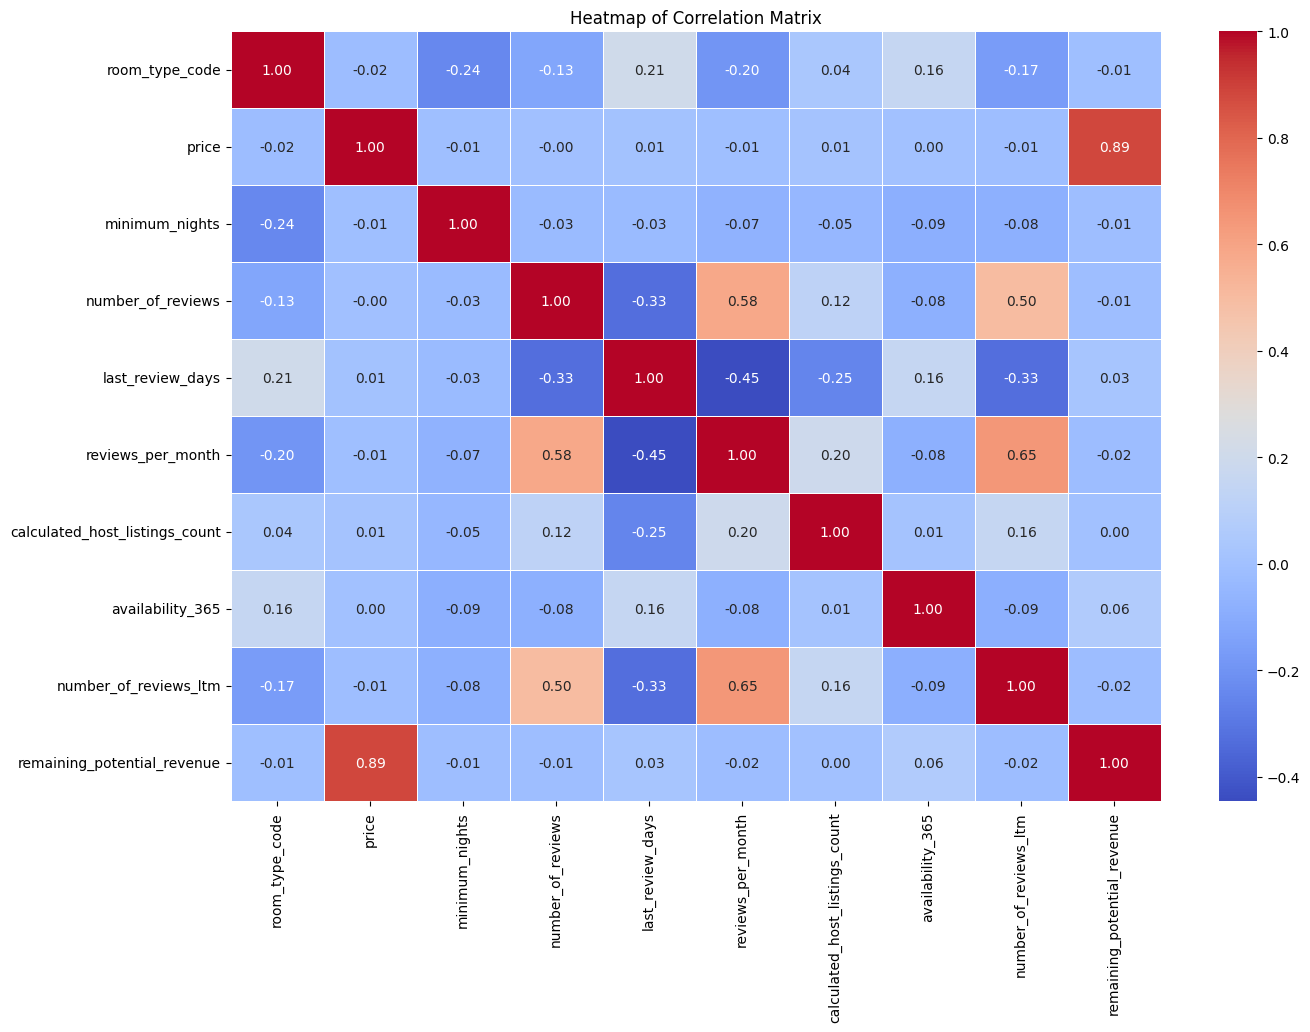

In [36]:
# Mengeluarkan variabel yang tidak diinginkan dari dataframe
variables_to_exclude = ['no','id','name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'last_review' , 'minimum_nights_code']
df_reduced = clean_df.drop(columns=variables_to_exclude)

# Menghitung matriks korelasi
correlation_matrix = df_reduced.corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


Berdasarkan analisis korelasi menunjukan bahwa tidak banyak variabel yang berkorelasi antar satu dengan lainya.

**2.4.1 Menggunakan parameter pada statistik deskriptif untuk menentukan nilai minimal `remaining_potential_revenue`**

In [37]:
display(clean_df.describe(include='all'))

,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,room_type_code,...,minimum_nights,number_of_reviews,last_review,last_review_days,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,remaining_potential_revenue,minimum_nights_code
count,14875.000000,1.487500e+04,14875,1.487500e+04,14874,14875,14875.000000,14875.000000,14875,14875.000000,...,14875.000000,14875.000000,14875,14875.000000,14875.000000,14875.000000,14875.000000,14875.000000,1.487500e+04,14875
unique,NaN,NaN,14696,NaN,5265,50,NaN,NaN,4,NaN,...,NaN,NaN,1620,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,New! La Chada Night Market 1BR 2PPL near MRT,NaN,K,Vadhana,NaN,NaN,Entire home/apt,NaN,...,NaN,NaN,no review,NaN,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,7,NaN,91,2034,NaN,NaN,8318,NaN,...,NaN,NaN,5399,NaN,NaN,NaN,NaN,NaN,NaN,8459
mean,7825.607731,2.197769e+07,NaN,1.521718e+08,NaN,NaN,1.255629,0.918748,NaN,1.541109,...,6.099832,17.196101,NaN,4310.702992,0.515890,2.795294,243.612101,3.498218,7.925561e+05,NaN
std,4596.747054,1.648754e+07,NaN,1.320782e+08,NaN,NaN,0.366893,0.268126,NaN,0.712723,...,9.706008,41.666690,NaN,4325.098620,0.957799,1.343756,125.563553,9.059159,6.439336e+06,NaN
min,0.000000,2.793400e+04,NaN,5.892000e+04,NaN,NaN,0.001368,0.000101,NaN,1.000000,...,1.000000,0.000000,NaN,556.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,NaN
25%,3823.500000,4.265220e+06,NaN,3.746517e+07,NaN,NaN,1.371295,1.005172,NaN,1.000000,...,1.000000,0.000000,NaN,633.000000,0.000000,1.000000,135.000000,0.000000,1.602000e+05,NaN
50%,7731.000000,2.236330e+07,NaN,1.179923e+08,NaN,NaN,1.373456,1.005572,NaN,1.000000,...,1.000000,2.000000,NaN,1629.000000,0.090000,4.000000,306.000000,0.000000,3.132000e+05,NaN
75%,11815.500000,3.608703e+07,NaN,2.394691e+08,NaN,NaN,1.375626,1.005829,NaN,2.000000,...,4.000000,14.000000,NaN,9999.000000,0.670000,4.000000,360.000000,3.000000,5.820660e+05,NaN


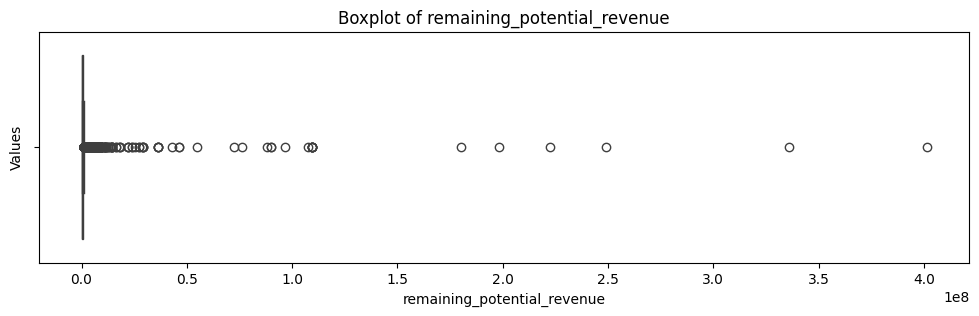

In [44]:
# Membuat boxplot untuk variabel remaining_potential_revenue
plt.figure(figsize=(12, 3))
sns.boxplot(x=clean_df['remaining_potential_revenue'])

plt.title('Boxplot of remaining_potential_revenue')
plt.xlabel('remaining_potential_revenue')
plt.ylabel('Values')

plt.show()

In [39]:
# Menghitung median dan Q1 (kuartil pertama)
median_value = clean_df['remaining_potential_revenue'].median()
q1_value = clean_df['remaining_potential_revenue'].quantile(0.25)

# Menghitung jumlah data (count) di bawah median
count_below_median = clean_df[clean_df['remaining_potential_revenue'] < median_value].shape[0]

# Menghitung jumlah nilai (sum) di bawah median
sum_below_median = clean_df[clean_df['remaining_potential_revenue'] < median_value]['remaining_potential_revenue'].sum()

# Menghitung jumlah data (count) di bawah Q1
count_below_q1 = clean_df[clean_df['remaining_potential_revenue'] < q1_value].shape[0]

# Menghitung jumlah nilai (sum) di bawah Q1
sum_below_q1 = clean_df[clean_df['remaining_potential_revenue'] < q1_value]['remaining_potential_revenue'].sum()

# Menampilkan hasil
print(f"Jumlah data di bawah median: {count_below_median}")
print(f"Jumlah nilai di bawah median: {sum_below_median}")
print(f"Jumlah data di bawah Q1: {count_below_q1}")
print(f"Jumlah nilai di bawah Q1: {sum_below_q1}")


Jumlah data di bawah median: 7434
Jumlah nilai di bawah median: 1151434647.0
Jumlah data di bawah Q1: 3713
Jumlah nilai di bawah Q1: 279023882.0


Berdasarkan data diatas, sebaiknya Airbnb menggunakan nilai median sebagai cut-off minimal untuk menentukan listings yang belum optimal karena nilai potensial revenue nya 5x lebih besar dibandingkan jika menggunakan q1 sebagai cut-off.

**2.4.2 Identifikasi jumlah listing belum optimal**

In [55]:
# Membuat dataframe baru dengan nilai 'remaining_potential_revenue' di bawah median
no_optimal_df = clean_df[clean_df['remaining_potential_revenue'] < median_value]

# Menambahkan kolom 'status' dengan nilai "no optimal" jika 'remaining_potential_revenue' di bawah median
no_optimal_df['status'] = np.where(no_optimal_df['remaining_potential_revenue'] < median_value, 'no optimal', 'optimal')

# Menampilkan hasil
display(no_optimal_df.head())

,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,room_type_code,...,number_of_reviews,last_review,last_review_days,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,remaining_potential_revenue,minimum_nights_code,status
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,1.375232,1.006240,Private room,2,...,0,no review,9999,0.00,1,365,0,292000.0,1,no optimal
9,9,952677,Standard Room Decor do Hostel,5171292,Somsak,Khlong San,0.137204,1.005076,Private room,2,...,4,27/12/2019,1653,0.03,4,87,0,60900.0,2-7,no optimal
23,23,1808600,Contemporary Modern Duplex-Thong Lo,9478184,Shine,Khlong Toei,1.372097,1.005782,Entire home/apt,1,...,83,12/09/2018,2036,0.75,1,55,0,114290.0,1,no optimal
30,30,156583,Studio near Chula University/Silom walk to MRT/BTS,58920,Gael,Bang Rak,0.137285,1.005231,Entire home/apt,1,...,63,25/11/2022,589,0.47,2,95,2,111720.0,2-7,no optimal
31,31,1823321,กรองทองแมนชั่น (ลาดพร้าว 81),9545111,Penjit,Wang Thong Lang,1.378938,0.100613,Private room,2,...,0,no review,9999,0.00,1,365,0,219000.0,1,no optimal


**2.4.3 Generate insights karakteristik skema penawaran pada listing yang belum optimal berdasarkan `room_type` & `minimum_nights`**

Menggunakan asumsi bahwa salah satu faktor yang menentukan preferensi visitor untuk memilih listings property adalah jenis ruangan yang ditawarkan serta batasan minimum malam diwajibkan oleh host. Hal tersebut masuk akal karena visitor perlu mencari property yang sesuai dengan kebutuhan ruangan serta jangka waktu liburan/menginap nya.

In [41]:
# Mengelompokkan dan menghitung agregat remaining_potential_revenue
agg_functions = {
    'remaining_potential_revenue': ['count','sum', 'min', 'median', 'max'],
    'price': ['count','sum', 'min', 'median', 'max']
}

# Membuat dataframe baru dengan agregat
room_type_summary = no_optimal_df.groupby('room_type').agg(agg_functions).reset_index()

# Mengurutkan berdasarkan sum remaining_potential_revenue secara descending
room_type_summary_sorted = room_type_summary.sort_values(by=('remaining_potential_revenue', 'sum'), ascending=False)

# Menampilkan hasil
display(room_type_summary_sorted.head())

room_type remaining_potential_revenue                              \
                                         count          sum  min    median   
0  Entire home/apt                        4111  633944848.0  0.0  160500.0   
2     Private room                        2685  435702429.0  0.0  170325.0   
3      Shared room                         383   49822290.0  0.0  128115.0   
1       Hotel room                         255   31965080.0  0.0  126448.0   

            price                                      
        max count        sum    min  median       max  
0  313000.0  4111  5837506.0  332.0  1085.0   20000.0  
2  313040.0  2685  3077063.0  278.0   800.0  161516.0  
3  298749.0   383   206318.0  280.0   450.0    4800.0  
1  310250.0   255   506505.0    0.0   955.0   23629.0

In [42]:
# Membuat crosstab antara room_type dan minimum_nights_code
room_type_cross_min_nights = pd.crosstab(no_optimal_df['room_type'], no_optimal_df['minimum_nights_code'], margins=True, margins_name="Total")

# Mengurutkan berdasarkan total secara descending
room_type_cross_min_nights_sorted = room_type_cross_min_nights.sort_values(by=('Total'), ascending=False)

# Mengatur urutan kolom sesuai urutan yang diinginkan
column_order = ['1', '2-7', '8-14', '15-30', '>30', 'Total']
room_type_cross_min_nights_sorted = room_type_cross_min_nights_sorted[column_order]

# Menampilkan hasil
display(room_type_cross_min_nights_sorted.head())

minimum_nights_code,1,2-7,8-14,15-30,>30,Total
room_type,,,,,,
Total,3880,1923,218,779,634,7434
Entire home/apt,1476,1309,178,601,547,4111
Private room,1816,575,37,176,81,2685
Shared room,353,26,3,1,0,383
Hotel room,235,13,0,1,6,255


In [43]:
# Menggabungkan room_type_summary_sorted dan room_type_cross_min_nights_sorted berdasarkan kolom room_type
room_type_summary_sorted.columns = ['room_type'] + ['_'.join(col).strip() for col in room_type_summary_sorted.columns.values[1:]]
merged_df = pd.merge(room_type_summary_sorted, room_type_cross_min_nights_sorted, left_on='room_type', right_index=True, how='inner')

# Menampilkan hasil
display(merged_df)

,room_type,remaining_potential_revenue_count,remaining_potential_revenue_sum,remaining_potential_revenue_min,remaining_potential_revenue_median,remaining_potential_revenue_max,price_count,price_sum,price_min,price_median,price_max,1,2-7,8-14,15-30,>30,Total
0,Entire home/apt,4111,633944848.0,0.0,160500.0,313000.0,4111,5837506.0,332.0,1085.0,20000.0,1476,1309,178,601,547,4111
2,Private room,2685,435702429.0,0.0,170325.0,313040.0,2685,3077063.0,278.0,800.0,161516.0,1816,575,37,176,81,2685
3,Shared room,383,49822290.0,0.0,128115.0,298749.0,383,206318.0,280.0,450.0,4800.0,353,26,3,1,0,383
1,Hotel room,255,31965080.0,0.0,126448.0,310250.0,255,506505.0,0.0,955.0,23629.0,235,13,0,1,6,255


**Insights & rekomendasi strategi program targeted ads untuk listings belum optimal berdasarkan karakteristik skema penawaran:**

- `room_type` berupa *entire home/apt* dan *private room* menempati porsi mayoritas dengan jumlah 6.796 listings atau 91% dari total keseluruhan jumlah listings yang belum optimal.
- Nilai `remaining_potential_revenue` pada kedua tipe tersebut adalah IDR 1.069.647.277 atau 92% dari total nilai potential revenue pada listings yang belum optimal. 
- Sebaiknya program targeted ads fokus untuk menawarkan tipe *entire home/apt* dan *private room*
- Untuk ads *entire home/apt* sebaiknya menargetkan visitor dengan budget penginapan pada range IDR 333 s.d IDR 200.000 per malam. Sedangkan untuk *private room* range nya sekitar IDR 278 s.d IDR 161.516 per malam.
- Pada tipe room *entire home/apt* dan *private room* sama-sama memiliki jumlah minimum sewa pada kategori 1 malam dan 2-7 malam. Sehingga sebaiknya target visitor adalah mereka yang cenderung menghabiskan waktu liburan <1minggu.

**2.4.4 Generate insights karakteristik visitor engagement pada listing yang belum optimal berdasarkan `number_of_review` & `review_per_month`**

Menggunakan asumsi bahwa listings dengan nilai anomali pada `number_of_reviews` dan `reviews_per_month` akan memberikan kita insights terkait dengan listings seperti apa yang di minati oleh visitor.

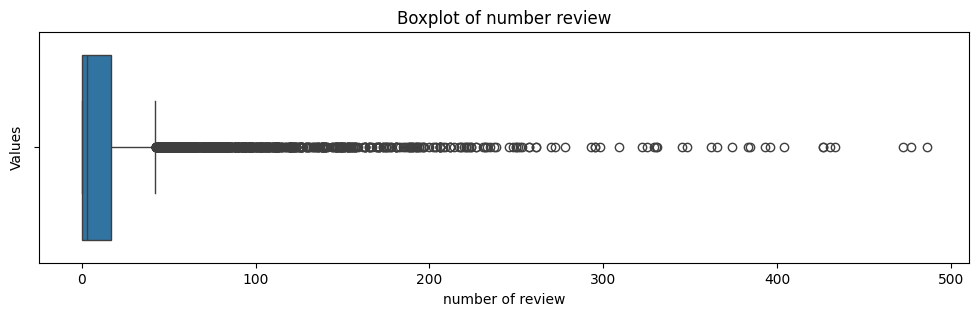

In [49]:
# Membuat boxplot untuk variabel number_of_revenue
plt.figure(figsize=(12, 3))
sns.boxplot(x=no_optimal_df['number_of_reviews'])

plt.title('Boxplot of number review')
plt.xlabel('number of review')
plt.ylabel('Values')

plt.show()

In [54]:
# Mnghitung q1, q2, q3 , lower fence & upper fence pada kolom number_of_reviews
percentiles = np.percentile(no_optimal_df['number_of_reviews'], [25, 50, 75])
q1 = percentiles[0]
median = percentiles[1]
q3 = percentiles[2]
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

print(f"nilai minimal number_of_reviews adalah {q1}")
print(f"nilai median number_of_reviews adalah {median}")
print(f"nilai maximal number_of_reviews adalah {q3}")
print(f"nilai lower fence number_of_reviews adalah {lower_fence}")
print(f"nilai upper fence number_of_reviews adalah {upper_fence}")

nilai minimal number_of_reviews adalah 0.0
nilai median number_of_reviews adalah 3.0
nilai maximal number_of_reviews adalah 17.0
nilai lower fence number_of_reviews adalah -25.5
nilai upper fence number_of_reviews adalah 42.5


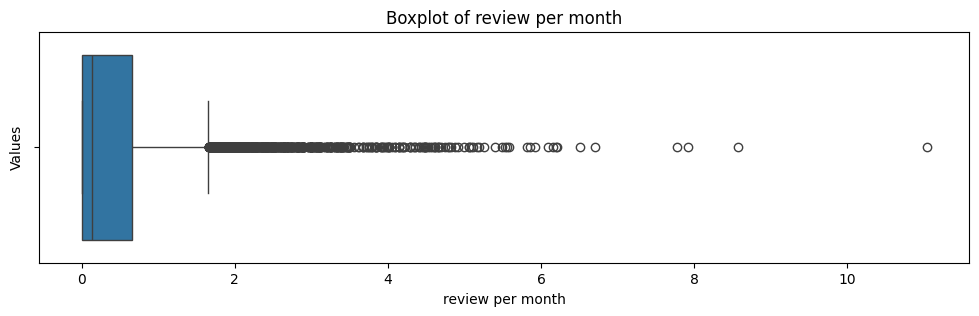

In [58]:
# Membuat boxplot untuk variabel review_per_month
plt.figure(figsize=(12, 3))
sns.boxplot(x=no_optimal_df['reviews_per_month'])

plt.title('Boxplot of review per month')
plt.xlabel('review per month')
plt.ylabel('Values')

plt.show()

In [59]:
# Mnghitung q1, q2, q3 , lower fence & upper fence pada kolom reviews_per_month
percentiles = np.percentile(no_optimal_df['reviews_per_month'], [25, 50, 75])
q1_reviews_per_month = percentiles[0]
median_reviews_per_month = percentiles[1]
q3_reviews_per_month = percentiles[2]
iqr_reviews_per_month = q3_reviews_per_month - q1_reviews_per_month
lower_fence_reviews_per_month = q1_reviews_per_month - 1.5 * iqr_reviews_per_month
upper_fence_reviews_per_month = q3_reviews_per_month + 1.5 * iqr_reviews_per_month

print(f"nilai minimal reviews_per_month adalah {q1_reviews_per_month}")
print(f"nilai median reviews_per_month adalah {median_reviews_per_month}")
print(f"nilai maximal reviews_per_month adalah {q3_reviews_per_month}")
print(f"nilai lower fence reviews_per_month adalah {lower_fence_reviews_per_month}")
print(f"nilai upper fence reviews_per_month adalah {upper_fence_reviews_per_month}")

nilai minimal reviews_per_month adalah 0.0
nilai median reviews_per_month adalah 0.13
nilai maximal reviews_per_month adalah 0.66
nilai lower fence reviews_per_month adalah -0.99
nilai upper fence reviews_per_month adalah 1.65


In [62]:
# Filter berdasarkan kolom 'reviews_per_month' >1.65 dan 'number_of_reviews' >42.5
review_anomalous_df = no_optimal_df[(no_optimal_df['reviews_per_month'] > 1.65) & (no_optimal_df['number_of_reviews'] > 42.5)]

# Menampilkan hasil
display(review_anomalous_df.head())

,no,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,room_type_code,...,number_of_reviews,last_review,last_review_days,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,remaining_potential_revenue,minimum_nights_code,status
53,53,1026451,"♡Chic Studio, Easy Walk to Pier & BTS Taksin♡",3346331,Bee,Sathon,1.371192,1.005154,Entire home/apt,1,...,472,15/12/2022,569,4.02,4,320,29,277120.0,2-7,no optimal
61,61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,1.374814,1.005202,Entire home/apt,1,...,295,21/08/2021,1050,2.61,3,0,0,0.0,1,no optimal
72,72,1943048,"Best nr Chatujak, MRT, BTS free wifi&fNetflix",9906827,Nokiko,Chatu Chak,1.381694,1.005645,Entire home/apt,1,...,293,06/12/2022,755,2.72,1,129,19,163959.0,1,no optimal
73,73,385130,❂Citycenter✔Subway station✔Private Bathroom4Aircon,1927968,Evan,Sathon,1.372062,1.005471,Entire home/apt,1,...,396,30/04/2020,1528,3.02,4,361,0,288800.0,1,no optimal
80,80,393066,✺✺99 feet in the sky✺✺,1927968,Evan,Sathon,1.372062,1.005471,Entire home/apt,1,...,430,01/10/2022,908,3.39,4,334,10,276886.0,1,no optimal


In [63]:
# Membuat crosstab antara room_type dan minimum_nights_code pada listings yang review nya anomali
room_type_cross_min_nights_anomali = pd.crosstab(review_anomalous_df['room_type'], review_anomalous_df['minimum_nights_code'], margins=True, margins_name="Total")

# Mengurutkan berdasarkan total secara descending
room_type_cross_min_nights_anomali_sorted = room_type_cross_min_nights_anomali.sort_values(by=('Total'), ascending=False)

# Mengatur urutan kolom sesuai urutan yang diinginkan
column_order = ['1', '2-7', '8-14', '15-30', '>30', 'Total']
room_type_cross_min_nights_anomali_sorted = room_type_cross_min_nights_anomali_sorted[column_order]

# Menampilkan hasil
display(room_type_cross_min_nights_anomali_sorted.head())

minimum_nights_code,1,2-7,8-14,15-30,>30,Total
room_type,,,,,,
Total,209,89,4,23,19,344
Entire home/apt,135,70,4,23,17,249
Private room,57,17,0,0,1,75
Hotel room,16,1,0,0,1,18
Shared room,1,1,0,0,0,2


**Insights & rekomendasi strategi program targeted ads untuk listings belum optimal berdasarkan karakteristik visitor engagement:**

- Berdasarkan listings yang memiliki nilai anomali pada `reviews_per_month` dan `number_of_reviews` terlihat bahwa mayoritas visitor lebih tertarik pada listings dengan `minimum_nights` 1 sd 7 malam. Hal tersebut semakin mendukung insisghts dan rekomendasi berdasarkan karakteristik skema penawaran.


In [64]:
# Menyimpan dataframe no_optimal_df ke dalam format CSV
no_optimal_df.to_csv('no_optimal_df.csv', index=False)

# Menampilkan pesan untuk mengonfirmasi penyimpanan file
print("Dataframe telah disimpan sebagai 'no_optimal_df.csv'")

Dataframe telah disimpan sebagai 'no_optimal_df.csv'
